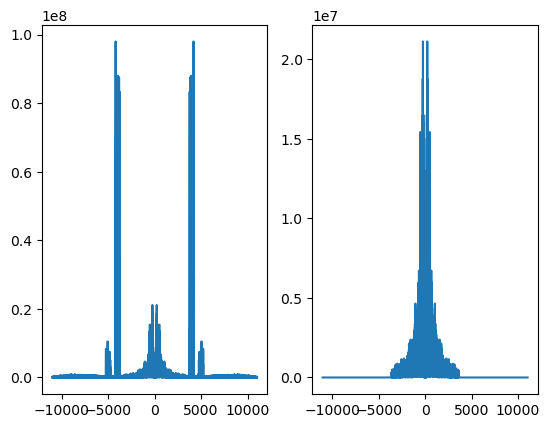

In [ ]:
from scipy.io import wavfile
import sounddevice as sd 
from numpy.fft import fft, ifft, fftfreq, fftshift, ifftshift
import numpy as np
import matplotlib.pyplot as plt

def main():

    fs, audio = wavfile.read('02.wav')

    N = len(audio)

    #sd.play(audio, fs)

    audio_response = fft(audio)

    audio_response_shift = fftshift(audio_response)

    audio_frequencies = fftfreq(N, d = 1/fs)

    audio_frequencies_shift = fftshift(audio_frequencies)

    plt.subplot(1,2,1)

    plt.plot(audio_frequencies_shift, np.abs(audio_response_shift))


    # NAO APAGAR ESTA PARTE

    # a partir desta frequencia de corte o ruido e eliminado, nao apagar
    # esta parte 
    wc = 3600 # hz

    audio_filtered = audio_response_shift.copy()

    for i in range(N):

        if np.abs(audio_frequencies_shift[i]) > wc:

            audio_filtered[i] = 0

    plt.subplot(1,2,2)

    plt.plot(audio_frequencies_shift, np.abs(audio_filtered))


    recovered_audio = ifftshift(audio_filtered)

    recovered_audio = np.real(ifft(recovered_audio))

    recovered_audio = recovered_audio / np.max(np.abs(recovered_audio))
    
    sd.play(recovered_audio, fs)
    
    
    
main()